In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.model_selection import train_test_split

file1 = pd.read_csv(r'C:\Users\tlghf\code\dataset\LH_1M_LOS.csv')
file2 = pd.read_csv(r'C:\Users\tlghf\code\dataset\LH_5M_LOS.csv')
file3 = pd.read_csv(r'C:\Users\tlghf\code\dataset\LH_8M_LOS.csv')
file4 = pd.read_csv(r'C:\Users\tlghf\code\dataset\LH_12M_LOS.csv')
file5 = pd.read_csv(r'C:\Users\tlghf\code\dataset\LH_15M_LOS.csv')

df = pd.concat([file1,file2,file3,file4,file5])
data = shuffle(df.to_numpy())
df.info()

X = df.drop(["Distance"], axis=1,inplace=False)
y = df["Distance"]

encoder = LabelEncoder()
encoder.fit(y)
y_encoded = keras.utils.to_categorical(encoder.transform(y))
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.33, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size=0.5, random_state=42)

print('X_train.shape:' + str(X_train.shape))
print('y_train.shape:' + str(y_train.shape))
print('X_val.shape:' + str(X_val.shape))
print('y_val.shape:' + str(y_val.shape))
print('X_test.shape:' + str(X_test.shape))
print('y_test.shape:' + str(y_test.shape))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9889 entries, 0 to 1999
Columns: 1017 entries, Distance to CIR1015
dtypes: int64(1016), object(1)
memory usage: 76.8+ MB
X_train.shape:(6625, 1016)
y_train.shape:(6625, 5)
X_val.shape:(1632, 1016)
y_val.shape:(1632, 5)
X_test.shape:(1632, 1016)
y_test.shape:(1632, 5)


In [37]:
model = Sequential()
model.add(Dense(64, input_dim=1016, activation='relu'))
model.add(Dense(64, input_dim=1016, activation='relu'))
model.add(Dense(64, input_dim=1016, activation='relu'))
model.add(Dense(64, input_dim=1016, activation='relu'))
model.add(Dense(64, input_dim=1016, activation='relu'))
model.add(Dense(64, input_dim=1016, activation='relu'))
model.add(Dense(3, activation='softmax'))
adam = keras.optimizers.Adam(lr=0.003)
es = [EarlyStopping(monitor ='val_loss',mode='min',patience =30), ModelCheckpoint(filepath='best_model.h5',monitor='val_loss',save_best_only=True)]

model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
hist = model.fit(X_train,y_train, epochs=300, batch_size=32, validation_data=(X_val, y_val),callbacks=[es])

C:\Users\tlghf\anaconda3\envs\lab\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/300
208/208 [==============================] - 2s 4ms/step - loss: 6.5394 - accuracy: 0.9195 - val_loss: 0.5813 - val_accuracy: 0.9877
Epoch 2/300
208/208 [==============================] - 1s 4ms/step - loss: 0.5783 - accuracy: 0.9860 - val_loss: 0.7683 - val_accuracy: 0.9835
Epoch 3/300
208/208 [==============================] - 1s 4ms/step - loss: 0.3415 - accuracy: 0.9899 - val_loss: 0.4022 - val_accuracy: 0.9933
Epoch 4/300
208/208 [==============================] - 1s 4ms/step - loss: 0.4654 - accuracy: 0.9902 - val_loss: 0.8961 - val_accuracy: 0.9773
Epoch 5/300
208/208 [==============================] - 1s 4ms/step - loss: 0.2041 - accuracy: 0.9961 - val_loss: 0.5465 - val_accuracy: 0.9920
Epoch 6/300
208/208 [==============================] - 1s 4ms/step - loss: 0.1383 - accuracy: 0.9956 - val_loss: 0.4084 - val_accuracy: 0.9939
Epoch 7/300
208/208 [==============================] - 1s 4ms/step - loss: 0.0850 - accuracy: 0.9967 - val_loss: 0.3156 - val_accuracy: 0.9939

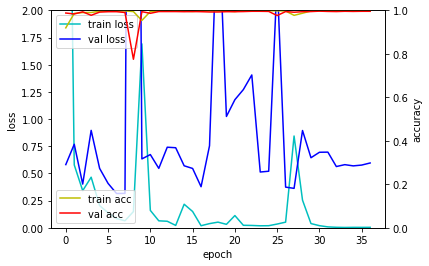

In [38]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 2.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'c', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'b', label='val loss')
acc_ax.plot(hist.history['accuracy'], 'y', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'r', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

26/26 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9982
loss_and_metrics : [0.003823476377874613, 0.998161792755127]
y_test:[[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]
y_pred:[[-0. -0. -0. -0.  1.]
 [-0. -0. -0. -0.  1.]
 [-0. -0.  1. -0. -0.]
 ...
 [-0. -0.  1. -0. -0.]
 [ 1. -0. -0. -0. -0.]
 [-0.  1. -0. -0. -0.]]
cf_matrix:[[327   0   0   0   1]
 [  1 324   0   0   0]
 [  1   0 336   0   0]
 [  1   0   0 301   0]
 [  0   0   0   0 340]]


<AxesSubplot:>

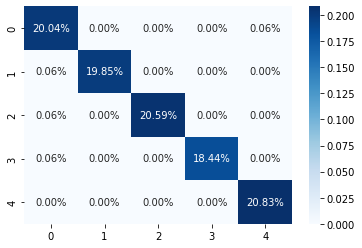

In [39]:
import seaborn as sns

loss_and_metrics = model.evaluate(X_test, y_test, batch_size=64)
print('loss_and_metrics : ' + str(loss_and_metrics))

y_pred = model.predict(X_test)
y_pred = np.ceil(y_pred-0.5)
print('y_test:' + str(y_test))
print('y_pred:' + str(y_pred))

cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('cf_matrix:' + str(cf_matrix))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt = '.2%', cmap='Blues')

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

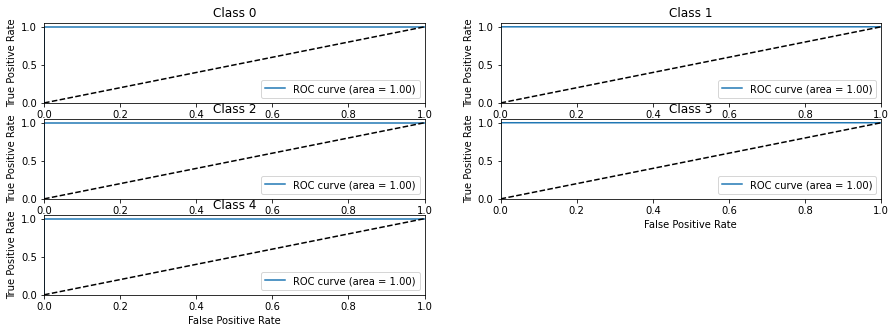

roc_auc_score:  0.9999976302846031


In [51]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
n_classes = 5

y_pred = model.predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(15, 5))
for idx, i in enumerate(range(n_classes)):
    plt.subplot(321+idx)
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class %0.0f' % idx)
    plt.legend(loc="lower right")
plt.show()

print("roc_auc_score: ", roc_auc_score(y_test, y_pred, multi_class='raise'))